In [1]:
# import common APIs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn import cross_validation, naive_bayes, tree, svm, ensemble
from sklearn.metrics import classification_report,confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve
from xgboost import XGBRegressor

//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Data observation
filepath = '/Users/mac/Desktop/Kaggle_datasets/Safe_Driver(Reg)/'
filename01 = 'train.csv'

df = pd.read_csv(os.path.join(filepath, filename01))
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [4]:
df.target.value_counts()

0    573518
1     21694
Name: target, dtype: int64

In [5]:
filepath = '/Users/mac/Desktop/Kaggle_datasets/Safe_Driver(Reg)/'
filename02 = 'test.csv'

df2 = pd.read_csv(os.path.join(filepath, filename02))
df2.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


In [6]:
filepath = '/Users/mac/Desktop/Kaggle_datasets/Safe_Driver(Reg)/'
filename03 = 'sample_submission.csv'

df3 = pd.read_csv(os.path.join(filepath, filename03))
df3.head()

,id,target
0,0,0.0364
1,1,0.0364
2,2,0.0364
3,3,0.0364
4,4,0.0364


In [7]:
# Data preprocessing
from sklearn.utils import shuffle

df.drop('id', axis=1, inplace=True)
shuffle_df = shuffle(df, random_state=42)

df_label = shuffle_df['target']
df_feature = shuffle_df.drop('target', axis=1)

cut_point = round(len(df)*0.6)
train_feature = np.array(df_feature.values[:cut_point,:])
train_label = np.array(df_label.values[:cut_point])
test_feature = np.array(df_feature.values[cut_point:,:])
test_label = np.array(df_label.values[cut_point:])

In [13]:
### tree.DecisionTreeRegressor()
from sklearn import cross_validation, tree
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                              test_size=0.25, random_state=0)
regr=tree.DecisionTreeRegressor()
regr.fit(X_train,y_train)
print("Traing Score:%f"%regr.score(X_train,y_train))
print("Testing Score:%f"%regr.score(X_test,y_test))
#np.mean(np.abs((regr.predict(test_feature)-test_label)/test_label)) #平均誤差百分比

Traing Score:1.000000
Testing Score:-1.303998


In [37]:
### ensemble.RandomForestRegressor()
from sklearn import cross_validation,ensemble
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                                test_size=0.25, random_state=0)
regr=ensemble.RandomForestRegressor()
regr.fit(X_train,y_train)
print("Traing Score:%f"%regr.score(X_train,y_train))
print("Testing Score:%f"%regr.score(X_test,y_test))

Traing Score:0.790828
Testing Score:-0.152782


In [38]:
### ensemble.AdaBoostRegressor()
from sklearn import cross_validation,ensemble
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label,
                                                                  test_size=0.25, random_state=0)
regr=ensemble.AdaBoostRegressor()
regr.fit(X_train,y_train)
print("Traing Score:%f"%regr.score(X_train,y_train))
print("Testing Score:%f"%regr.score(X_test,y_test))

Traing Score:0.004517
Testing Score:0.004009


### GradientBoostingRegressor() 跟 XGB伯仲之間，可是訓練時間超久！！

In [39]:
### ensemble.GradientBoostingRegressor()
from sklearn import cross_validation,ensemble
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label,
                                                                  test_size=0.25, random_state=0)
regr=ensemble.GradientBoostingRegressor()
regr.fit(X_train,y_train)
print("Traing Score:%f"%regr.score(X_train,y_train))
print("Testing Score:%f"%regr.score(X_test,y_test))

Traing Score:0.016172
Testing Score:0.009060


### XGB 94強...

In [8]:
# XGBRegressor
from xgboost import XGBRegressor
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label,
                                          test_size=0.25,random_state=0)
regr=XGBRegressor()
regr.fit(X_train,y_train)
print("Traing Score:%f"%regr.score(X_train,y_train))
print("Testing Score:%f"%regr.score(X_test,y_test))

Traing Score:0.015627
Testing Score:0.009405


# Tuning the parameters

In [18]:
# XGBRegressor
# Default: XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, objective='reg:linear', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

from xgboost import XGBRegressor
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label,
                                          test_size=0.25,random_state=0)
regr = XGBRegressor(
    max_depth=10, 
    learning_rate=0.2, 
    n_estimators=200, 
    silent=True, 
    objective='reg:linear', 
    #nthread=None, 
    #gamma=0, 
    #min_child_weight=1, 
    #max_delta_step=0, 
    #subsample=1, 
    #colsample_bytree=1, 
    #colsample_bylevel=1, 
    #reg_alpha=0, 
    #reg_lambda=1, 
    #scale_pos_weight=1, 
    #base_score=0.5, 
    #seed=None, 
    #missing=None,
    )

regr.fit(X_train,y_train)
print("Traing Score:%f"%regr.score(X_train,y_train))
print("Testing Score:%f"%regr.score(X_test,y_test))

Traing Score:0.656000
Testing Score:-0.069946


In [24]:
from sklearn.grid_search import GridSearchCV

#用dict傳參數
parameters={
    'max_depth':[2,3,4], 
    'learning_rate':[0.1,0.2], 
    'n_estimators':[50,100],
}

model = XGBRegressor()
grid = GridSearchCV(estimator=model, 
                    param_grid=parameters,
                    cv=3,
                    verbose=5,)

grid.fit(X_train,y_train)

print(grid.best_score_)
print(grid.best_estimator_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] n_estimators=50, learning_rate=0.1, max_depth=2 .................
[CV]  n_estimators=50, learning_rate=0.1, max_depth=2, score=0.008441 -   7.2s
[CV] n_estimators=50, learning_rate=0.1, max_depth=2 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.2s remaining:    0.0s


[CV]  n_estimators=50, learning_rate=0.1, max_depth=2, score=0.007748 -   7.4s
[CV] n_estimators=50, learning_rate=0.1, max_depth=2 .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.7s remaining:    0.0s


[CV]  n_estimators=50, learning_rate=0.1, max_depth=2, score=0.008667 -   9.7s
[CV] n_estimators=100, learning_rate=0.1, max_depth=2 ................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   24.4s remaining:    0.0s


[CV]  n_estimators=100, learning_rate=0.1, max_depth=2, score=0.009753 -  16.7s
[CV] n_estimators=100, learning_rate=0.1, max_depth=2 ................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   41.1s remaining:    0.0s


[CV]  n_estimators=100, learning_rate=0.1, max_depth=2, score=0.008819 -  18.7s
[CV] n_estimators=100, learning_rate=0.1, max_depth=2 ................
[CV]  n_estimators=100, learning_rate=0.1, max_depth=2, score=0.009918 -  21.5s
[CV] n_estimators=50, learning_rate=0.1, max_depth=3 .................
[CV]  n_estimators=50, learning_rate=0.1, max_depth=3, score=0.009031 -  15.2s
[CV] n_estimators=50, learning_rate=0.1, max_depth=3 .................
[CV]  n_estimators=50, learning_rate=0.1, max_depth=3, score=0.008158 -  14.6s
[CV] n_estimators=50, learning_rate=0.1, max_depth=3 .................
[CV]  n_estimators=50, learning_rate=0.1, max_depth=3, score=0.009717 -  13.7s
[CV] n_estimators=100, learning_rate=0.1, max_depth=3 ................
[CV]  n_estimators=100, learning_rate=0.1, max_depth=3, score=0.009725 -  29.4s
[CV] n_estimators=100, learning_rate=0.1, max_depth=3 ................
[CV]  n_estimators=100, learning_rate=0.1, max_depth=3, score=0.008598 -  35.2s
[CV] n_estimators

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 14.1min finished


0.00963492633263067
XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.2, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)


In [30]:
grid.best_params_

{'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 100}

In [9]:
# 調整成最佳參數的XGBRegressor
from xgboost import XGBRegressor
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label,
                                          test_size=0.25,random_state=0)
regr= XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.2, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

regr.fit(X_train,y_train)

print("Traing Score:%f"%regr.score(X_train,y_train))
print("Testing Score:%f"%regr.score(X_test,y_test))

Traing Score:0.013634
Testing Score:0.008926


In [32]:
ans_train = regr.predict(test_feature)
ans_train

array([ 0.02281702,  0.04230547,  0.03215387, ...,  0.050439  ,
        0.02625221,  0.02031264], dtype=float32)

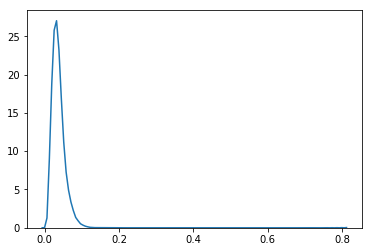

In [33]:
sns.kdeplot(ans_train)

In [10]:
df2.drop('id', axis=1, inplace=True)
df2_feature = np.array(df2.values)

In [11]:
ans_test = regr.predict(df2_feature)
ans_test

array([ 0.02853408,  0.03256738,  0.03038755, ...,  0.03900239,
        0.02681893,  0.03101519], dtype=float32)

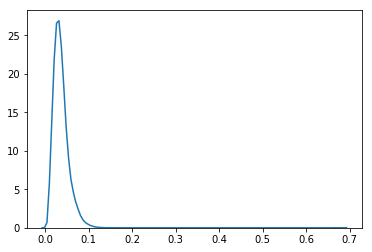

In [36]:
sns.kdeplot(ans_test)

In [13]:
positive = np.where(ans_test<0, 0, ans_test)

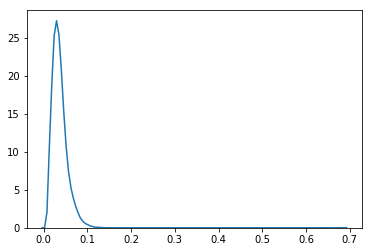

In [14]:
sns.kdeplot(positive)

In [15]:
df3['target'] = positive
df3.head()

,id,target
0,0,0.028534
1,1,0.032567
2,2,0.030388
3,3,0.011949
4,4,0.038435


In [16]:
df3.describe()

,id,target
count,8.928160e+05,892816.000000
mean,7.441535e+05,0.036624
std,4.296830e+05,0.018261
min,0.000000e+00,0.000000
25%,3.720218e+05,0.024369
50%,7.443070e+05,0.033682
75%,1.116308e+06,0.045204
max,1.488026e+06,0.689391


In [17]:
df3.to_csv('GBreg_param_Ans.csv', index=0)